# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №3: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 5 ноября 2019, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 5 ноября, -4 балла после 06:00 12 ноября, -6 баллов после 06:00 19 ноября  -8 баллов после 06:00 26 ноября.

При отправлении ДЗ указывайте фамилию в названии файла<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Моё решение:***
$$\vec{\hat{w}} = (w_1, w_2, ..., w_D)$$
$$\vec{w} = (w_0, w_1, ..., w_D)$$
$$\vec{\hat{w}}_0 = (0, w_1, w_2, ..., w_D)$$
$$a(x_{i}, w) = \sum_{j = 0}^{D} x_{ij}w_{j},$$
$$L(w) = \frac{1}{n}\sum_{i} (y_{i} - a(\vec{x}_{i}, \vec{w}))^{2} + \frac{1}{C}\sum_{j = 1}^{D}w_{j}^{2}$$
$$L(w) = \frac{1}{n}\|{\vec{y} - X\vec{w}}\|^{2} + \frac{1}{C}\|\vec{\hat{w}}\|^{2} =$$
$$= \frac{1}{n}(\vec{y} - X\vec{w})^{T}(\vec{y} - X\vec{w}) + \frac{1}{C}\vec{\hat{w}}^{T}\vec{\hat{w}} =$$
$$= \frac{1}{n}(-2\vec{w}^{T}X^{T}\vec{y} + \vec{w}^{T}X^{T}X\vec{w}) + \frac{1}{C}\vec{\hat{w}}^{T}\vec{\hat{w}}$$
$$\nabla_{\vec{w}}L(\vec{w}) = \frac{1}{n}(-2X^T\vec{y} + 2X^{T}X\vec{w}) + \frac{2}{C}\vec{\hat{w}}_0 =$$
$$= \frac{2}{N}(X^{T}X\vec{w} - X^{T}\vec{y}) + \frac{2}{C}\vec{\hat{w}}_0 = $$
$$= \frac{2}{N}X^{T}(X\vec{w} - \vec{y}) + \frac{2}{C}\vec{\hat{w}}_0$$

$$\vec{w}_{new} = \vec{w}_{old} - \frac{2}{N}X^{T}(X\vec{w} - \vec{y}) - \frac{2}{C}\vec{\hat{w}}_0$$

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Моё решение:***
$$\vec{\hat{w}} = (w_1, w_2, ..., w_D)$$
$$\vec{w} = (w_0, w_1, ..., w_D)$$
$$\vec{\hat{w}}_0 = (0, w_1, w_2, ..., w_D)$$
$$a_i = a(x_i) = \sigma( \langle\,\vec{x}_i,\vec{w}\rangle ),$$
$$a(X)^T = [\sigma( \langle\,\vec{x}_0,\vec{w}\rangle ... \sigma\langle\,\vec{x}_n,\vec{w}\rangle] ),$$
$$ \vec{y} = [y_0 ... y_n]$$
$${\nabla_{\vec{w}}}Q(\vec{w}) ={-\nabla_{\vec{w}}}\frac{1}{n}\left[\sum_{i}y_i \log a_i + ( 1 - y_i) \log (1 - a_i)\right] + \frac{1}{C}\nabla_{\vec{w}}\sum_{i=1}^D{w_i^2}=$$
$${=\nabla_{\vec{w}}}\frac{1}{n}\left[\sum_{i} y_i\log{(1+e^{-\langle\,\vec{x}_i,\vec{w}\rangle})} + (1-y_i)\log{\frac{e^{-\langle\,\vec{x}_i,\vec{w}\rangle}+1}{e^{-\langle\,\vec{x}_i,\vec{w}\rangle}}}\right] + \frac{1}{C}\nabla_{\vec{w}}\sum_{i=1}^D{w_i^2}$$
$${=\nabla_{\vec{w}}}\frac{1}{n}\left[\sum_{i} y_i\log{e^{-\langle\,\vec{x}_i,\vec{w}\rangle}} - \log{(1-e^{-\langle\,\vec{x}_i,\vec{w}\rangle}})\right] + \frac{1}{C}\nabla_{\vec{w}}\sum_{i=1}^D{w_i^2}$$

$${=\nabla_{\vec{w}}}\frac{1}{n}\left[\sum_i -y_i{\langle\,\vec{x}_i,\vec{w}\rangle} + \log\frac{1}{1+e^{-(\vec{x}_i,\vec{w})}}\right] + \frac{1}{C}\nabla_{\vec{w}}\sum_{i=1}^D{w_i^2}= $$
$$=\frac{1}{n}(- \vec{y} + a(X)^T)X + \frac{2}{C}\vec{\hat{w}}_0$$
$$ \vec{w}_{new} = \vec{w}_{old} + \frac{1}{n}(\vec{y} - a(X)^T)X - \frac{2}{C}\vec{\hat{w}}_0$$

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Моё решение:***
$$Q(w) = \|Xw − y\| = (Xw − y)^T(Xw − y)$$
$$\nabla_wQ(w) = \nabla_w(w^TX^TXw − w^TX^Ty − y^TXw + y^Ty) = 2X^TXw − 2X^Ty$$
Критерий минимума функции нескольих переменных в точке экстремума: Гессиан функции положительно определён.
$$\nabla_w(\nabla_wQ(w)) = \nabla_w(2X^TXw − 2X^Ty) = 2X^TX$$
$$rank(X^TX) = rank(X) = dim(\vec{w})$$
матрица $X^TX$ - это матрица Грамма. Так как она имеет максимальный ранг, то она положительно определена ч.т.д.

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Моё решение:***


$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - (1 - p(y_i = 1 | x_i))\log( 1 - a(x_i))$$
Обозначим $p_1 := p(y_i = 1| x_i)$, $a := a(x_i)$
$$E(L|x_i) = -p_1\log a - (1 - p_1)\log (1 - a)$$
$$E_{a}^{'}(L|x_i) = p_1(-\frac{1}{1-a} - \frac{1}{a}) + \frac{1}{1-a} =$$
$$= \frac{-p_1}{(1-a)a} + \frac{1}{1-a} = 0$$
$$a = p_1$$
$a = p_1$ - точка экстремума. Проверим, что в ней достигается максимум:
$$L_{aa}^{''} = p_1\frac{1 - 2a}{(1 - a)^2a^2} + \frac{1}{(1 - a)^2}$$
$$L_{aa}^{''}(a = p_1) = \frac{1 - 2p_1}{(1 - p_1)^2p_1} + \frac{1}{(1 - p_1)^2} = \frac{1 - p_1}{(1 - p_1)^2p_1} > 0$$

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь***

Нет, не нужно. Мы вводим $w_0$ для того, чтобы задать отступ разделяющей плоскости от начала координат, и его нет смысла уменьшать.

#  Реализация линейной модели (5 баллов)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [24]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [25]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [26]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [27]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [28]:
def batch_generator(X, y, shuffle=True, batch_size=4):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    indexes = np.arange(len(y))
    if shuffle:
        np.random.shuffle(indexes)
    for ind_slice in [indexes[i: i + batch_size] for i in range(0,len(indexes), batch_size)]:
        X_batch = X[ind_slice]
        y_batch = y[ind_slice]
        yield (X_batch, y_batch)
# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [40]:
# %%pycodestyle

from sklearn.base import BaseEstimator, ClassifierMixin


def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """

    sigm_value_x = 1.0 / (1.0 + np.exp(-x))
    return sigm_value_x


class MySGDClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, batch_generator, C=1, alpha=0.01,
                 max_epoch=10, model_type='lin_reg', batch_size=1):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """

        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.batch_size = batch_size
        self.errors_log = {'iter': [], 'loss': []}
        self.model_type = model_type

    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """

        if self.model_type == 'lin_reg':
            loss = np.sum((X_batch@self.weights - y_batch)**2) / len(y_batch)
        else:
            p = sigmoid(X_batch@self.weights)
            loss = - (np.dot(y_batch, np.log(p)) +
                    np.dot(1.0 - y_batch, np.log(1.0 - p))) / len(y_batch)
        loss += np.sum(self.weights[1::] ** 2) / self.C
        return loss

    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """

        tmp = X_batch@self.weights
       # print(tmp.shape)
        if self.model_type == 'log_reg':
            tmp = sigmoid(tmp)
        loss_grad = 2*((tmp - y_batch)@X_batch / len(y_batch) +
                       self.weights*self.weights_mul / self.C)
        return loss_grad

    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """

        self.weights -= self.alpha*new_grad

    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''

        X = np.c_[np.ones(shape=(X.shape[0])), X]
        self.weights = np.random.rand(X.shape[1])
        self.weights_mul = np.ones(shape=(X.shape[1]))
        self.weights_mul[0] = 0

        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y, batch_size=self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)

        return self
    
    def predict(self, X, threshold):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        X = np.hstack((np.ones(shape=(X.shape[0], 1)), X))
        X[:, -1] *= 0
        y_hat = X@self.weights
        if self.model_type == 'log_reg':
            y_hat = y_hat > threshold
        return y_hat


Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [41]:
def plot_decision_boundary(w, X):

    print(*w)

    x1min, x1max = X[:,0].min(), X[:,0].max()
    x2min, x2max = X[:,1].min(), X[:,1].max()

    if np.abs(w[1]) > np.abs(w[2]):
        x2 = np.linspace(x2min, x2max)
        x1 = -(w[2]*x2 + w[0])/w[1]

        mask = np.logical_and(x1 > x1min, x1 < x1max)
        x2 = x2[mask]
        x1 = x1[mask]
    else:
        x1 = np.linspace(x1min, x1max)
        x2 = -(w[1]*x1 + w[0])/w[2]

        mask = np.logical_and(x2 > x2min, x2 < x2max)
        x1 = x1[mask]
        x2 = x2[mask]

    plt.plot(x1, x2)

0.05708013060836152 0.07017738628075607 -0.07680708159980593


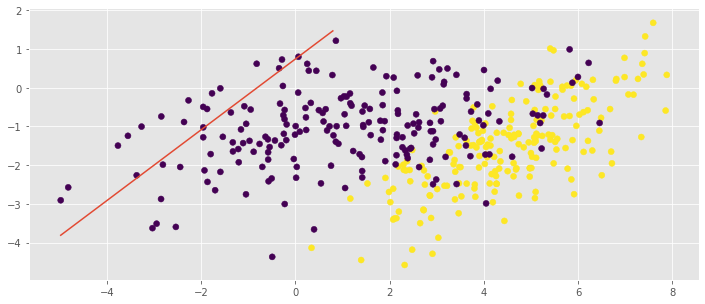

In [43]:
from sklearn.linear_model import SGDClassifier

np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

clf = MySGDClassifier(batch_generator, model_type='lin_reg')
clf.fit(X, y)
plot_decision_boundary(clf.weights, X)

plt.scatter(X[:,0], X[:,1], c=y)

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [46]:
from sklearn.datasets import make_classification

In [47]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

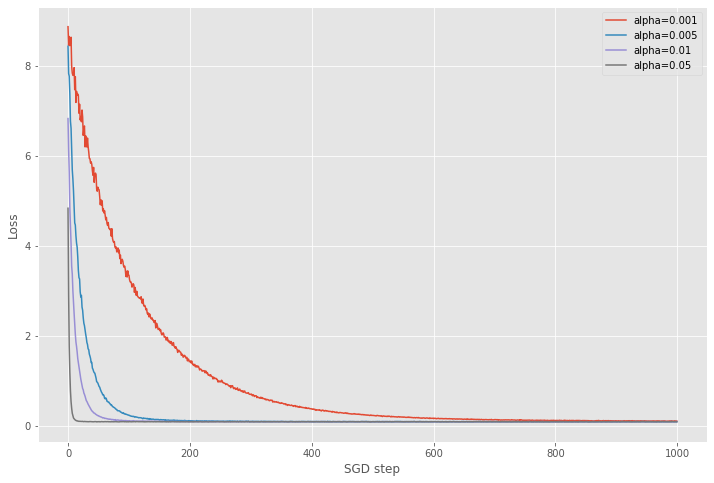

In [48]:
N = 100
aplhas = [0.001, 0.005, 0.01, 0.05]
MAX_N = 1000

fig, ax = plt.subplots(figsize=(12, 8))

for alpha in ALPHA_VALUES:
    results = np.zeros(MAX_N)
    for i in range(NUM_STEPS):
        clf = MySGDClassifier(batch_generator, alpha=alpha, max_epoch=1, batch_size=(100000 // MAX_N))
        clf.fit(X, y)
        results += np.array(clf.errors_log['loss'])
    results /= NUM_STEPS
    ax.plot(range(MAX_N), results, label=f'alpha={alpha}')
    
ax.legend()
ax.set_xlabel('SGD step')
ax.set_ylabel('Loss')
plt.show()

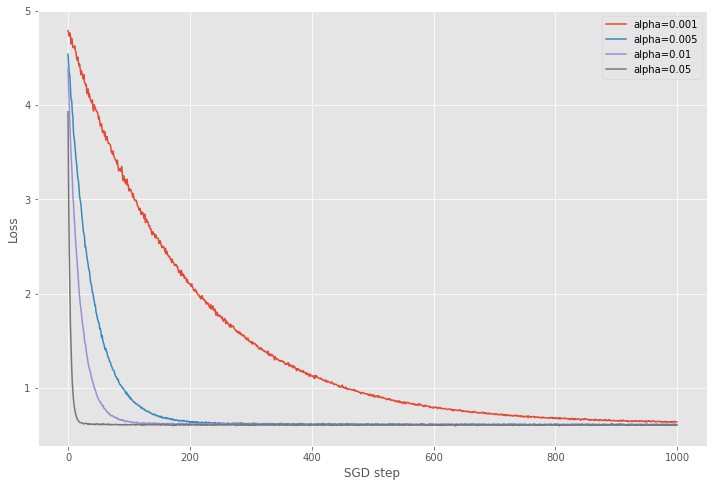

In [49]:
NUM_STEPS = 20
ALPHA_VALUES = [0.001, 0.005, 0.01, 0.05]
MAX_N = 1000

fig, ax = plt.subplots(figsize=(12, 8))

for alpha in ALPHA_VALUES:
    results = np.zeros(MAX_N)
    for i in range(NUM_STEPS):
        clf = MySGDClassifier(batch_generator, alpha=alpha, max_epoch=1, batch_size=(100000 // MAX_N), model_type='log_reg')
        clf.fit(X, y)
        results += np.array(clf.errors_log['loss'])
    results /= NUM_STEPS
    ax.plot(range(MAX_N), results, label=f'alpha={alpha}')
    
ax.legend()
ax.set_xlabel('SGD step')
ax.set_ylabel('Loss')
plt.show()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

/home/maksim/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':
/home/maksim/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
/home/maksim/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
/home/maksim/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: overflow encountered in double_scalars
/home/maksim/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: overflow encountered in square
/home/maksim/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/maksim/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: overflow encountered in true_divide
/home/maksim/miniconda

[1.00000000e+03 2.15443469e+02 4.64158883e+01 1.00000000e+01
 2.15443469e+00 4.64158883e-01 1.00000000e-01 2.15443469e-02
 4.64158883e-03 1.00000000e-03]
[0.919820524293661, 0.7774767568516251, 0.5087322661238605, 0.3033491120011822, 0.1534302885622784, 0.054420965561866194, 0.031150688763788684, 0.01414670134841579, nan, nan]


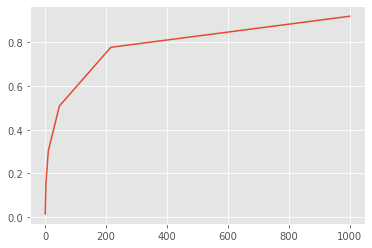

In [14]:
C_VALUES = np.logspace(3, -3, 10)

results = []

for C in C_VALUES:
    clf = MySGDClassifier(batch_generator, C=C, max_epoch=1, model_type='log_reg')
    clf.fit(X, y)
    results.append(np.mean(np.abs(clf.weights)))
print(C_VALUES)
print(results)
plt.plot(C_VALUES, results)


/home/maksim/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: overflow encountered in double_scalars
/home/maksim/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: overflow encountered in square
/home/maksim/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: overflow encountered in square
/home/maksim/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: overflow encountered in true_divide
/home/maksim/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: overflow encountered in multiply
/home/maksim/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in subtract
/home/maksim/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in matmul
/home/maksim/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: inva

[1.00000000e+03 2.15443469e+02 4.64158883e+01 1.00000000e+01
 2.15443469e+00 4.64158883e-01 1.00000000e-01 2.15443469e-02
 4.64158883e-03 1.00000000e-03]
[0.1259041326490705, 0.11644345431132663, 0.11673080006245497, 0.11714696933133477, 0.0996538570028846, 0.0836797324247118, 0.06200906083756635, 0.055272472441463154, nan, nan]


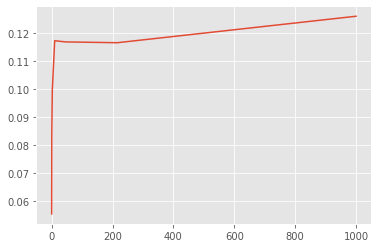

In [15]:
results = []

for C in C_VALUES:
    clf = MySGDClassifier(batch_generator, C=C, max_epoch=1, model_type='lin_reg')
    clf.fit(X, y)
    results.append(np.mean(np.abs(clf.weights)))
print(C_VALUES)
print(results)
plt.plot(C_VALUES, results)

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (3  балла)

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [53]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [54]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [55]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [35]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [36]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    classes = np.unique(X[:, -1])
    if shuffle:
        np.random.shuffle(classes)
    
    for cl in classes:
        indexes = X[:, -1] == cl
        X_batch = X[indexes]
        y_batch = y[indexes]
        X_batch[:, -1] *= 0
        yield X_batch, y_batch


In [37]:
from sklearn.model_selection import KFold

In [38]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [50]:
att = list()
for alpha in [0.000001, 0.0000001]:
    print(alpha)
    for max_epoch in [50, 100]:
        for threshold in np.arange(0.8, 1, 0.025):
            print(threshold)
            tmp = list()
            for train_index, test_index in KFold(5).split(np.c_[X_train, 
                                                                groups_train.reshape(-1, 1)]):
                cls = MySGDClassifier(batch_generator, C=0.01, 
                                      alpha=alpha, max_epoch=max_epoch, model_type='log_reg')
                cls.fit(X_train[train_index], y_train[train_index])
                tmp.append(f1_score(y_train[test_index], 
                                    cls.predict(X_train[test_index], threshold)))
            att.append([alpha, max_epoch, threshold, np.mean(tmp)])

1e-06
0.8


/home/maksim/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log


0.8250000000000001
0.8500000000000001
0.8750000000000001
0.9000000000000001
0.9250000000000002
0.9500000000000002
0.9750000000000002
0.8
0.8250000000000001
0.8500000000000001
0.8750000000000001
0.9000000000000001
0.9250000000000002
0.9500000000000002
0.9750000000000002
1e-07
0.8
0.8250000000000001
0.8500000000000001
0.8750000000000001
0.9000000000000001
0.9250000000000002
0.9500000000000002
0.9750000000000002
0.8
0.8250000000000001
0.8500000000000001
0.8750000000000001
0.9000000000000001
0.9250000000000002
0.9500000000000002
0.9750000000000002


In [51]:
att.sort(key=(lambda el: el[3]))
att 

[[1e-06, 50, 0.8500000000000001, 0.6040742460081456],
 [1e-07, 50, 0.9250000000000002, 0.6050393933523501],
 [1e-07, 50, 0.8, 0.6052926687326188],
 [1e-06, 50, 0.9000000000000001, 0.6057980037541904],
 [1e-07, 50, 0.9000000000000001, 0.6060103825907284],
 [1e-06, 100, 0.8500000000000001, 0.6067889196131573],
 [1e-06, 50, 0.8250000000000001, 0.6068015094301227],
 [1e-07, 50, 0.9750000000000002, 0.6069248010773014],
 [1e-06, 50, 0.9500000000000002, 0.6074792197555908],
 [1e-06, 100, 0.9500000000000002, 0.6077916180467252],
 [1e-07, 100, 0.9500000000000002, 0.6078347121180989],
 [1e-06, 50, 0.8, 0.6080466033839617],
 [1e-07, 100, 0.8250000000000001, 0.6082728839463483],
 [1e-06, 50, 0.9750000000000002, 0.6087075598227913],
 [1e-07, 100, 0.8750000000000001, 0.6089855688599747],
 [1e-06, 100, 0.9250000000000002, 0.6092428639711871],
 [1e-06, 100, 0.8250000000000001, 0.6092623336711609],
 [1e-07, 100, 0.8, 0.6092728033656291],
 [1e-07, 50, 0.9500000000000002, 0.6093430079864227],
 [1e-06, 10

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [54]:
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    pair_id = new_doc['pair_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, pair_id, title))
    
X_test = []
pairs_id = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, pair_id, title) in enumerate(docs):
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            *_, title_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15]    )
        pairs_id.append(pair_id)
X_test = np.array(X_test)
X_test = scaler.transform(X_test)
print (X_test.shape)

(16627, 15)


In [61]:
cls = MySGDClassifier(batch_generator, C=0.01, alpha=1e-07, max_epoch=100, model_type='log_reg')
cls.fit(X_train, y_train)
# 1e-07, 100, 0.9000000000000001

/home/maksim/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log


MySGDClassifier(C=0.01, alpha=1e-07,
                batch_generator=<function batch_generator at 0x7f6adc2d8e18>,
                batch_size=1, max_epoch=100, model_type='log_reg')

In [72]:
pred = cls.predict(X_test, 0.5)
pred = [int(x) for x in pred]

In [73]:
with open("answer.csv", "w") as f:
    f.write("pair_id,target\n")
    for i in range(len(pred)):
        f.write(str(pairs_id[i]))
        f.write(",")
        f.write(str(pred[i]))
        f.write("\n")
    

In [60]:
len(pred), sum(pred)

(16627, 6088)

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук прислать Ваш ник на kaggle, под которым Вы залили решение, которое побило первый бейзлайн. **

## Никнейм на kaggle: Max Kulis ##

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

Всё более менее понятно, курс составлен грамотно (´｡• ω •｡`).

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

Домашка сложная (｡•́︿•̀｡). Хотелось бы побольше решать прикладных задач. Понятное дело, что азы - это важно, но без хорошей практики знания быстро выветриваются (по крайней мере у меня). А так, курс супер. Кстати, когда проверят knn? ヽ( `д´*)ノ